<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 10 - Time Series data

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Understand and handle Time Series Data

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Time Series data

In this notebook we will cover

* how to use Pandas capabilities to extract information from date/time
* how to resample your time series using `.resample()`
* how to calculate moving average using `.rolling().mean()`
* how to shift and calculate differences and percentual changes with `.shift()`, `.diff()` and `.pct_change()`

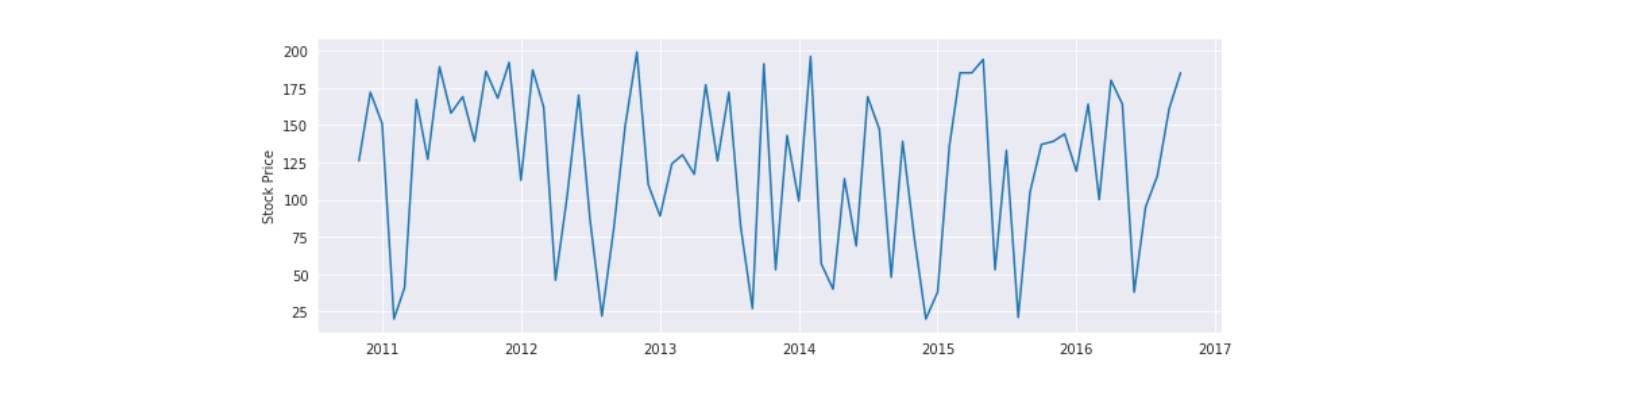

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Pandas is also known for **handling time series data**.


The example below has an datetime index, hourly based, 24 periods starting from 27 Oct 2019

np.random.seed(3)
df = pd.DataFrame(data={'Col1':np.random.randint(low=20,high=35,size=24) }, 
                    index=pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'))

df

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Extract information from date/time

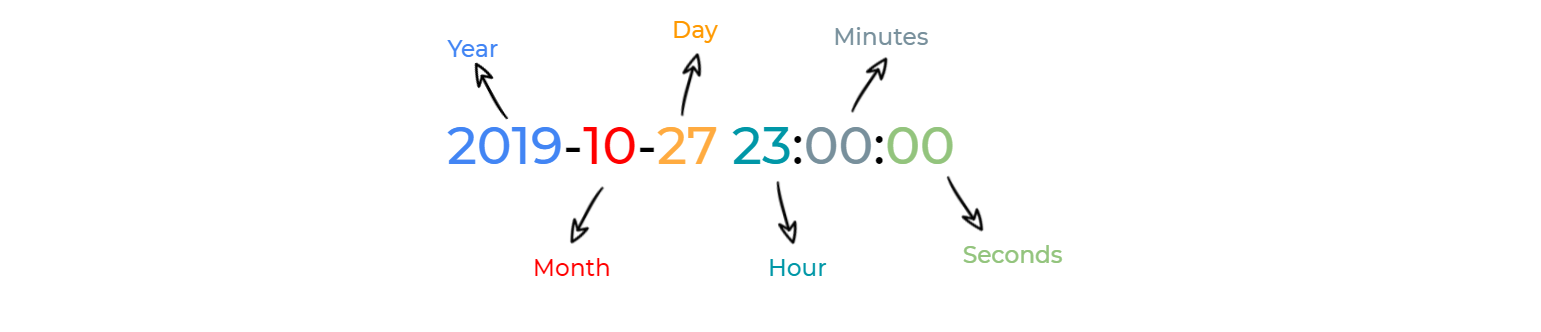

You can extract date information from your datetime index, accessing its attributes.

df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Seconds'] = df.index.second
df['Day'] = df.index.day
df['WeekDay_number'] = df.index.weekday
df['WeekDay_text'] = df.index.day_name()
df['Month_number'] = df.index.month
df['Month_short'] = df.index.month_name()
df['Year'] = df.index.year
df['Year-Month'] = df.index.to_period('M')

df.head()

You can start typing your DataFrame name, then .index.
* The image below has a list containing all possible attributes (blue icon) and functions (purple icon). Each of these contains more methods for extracting date time information, like `.microsecond`, `.is_month_start`or `.month_name()`

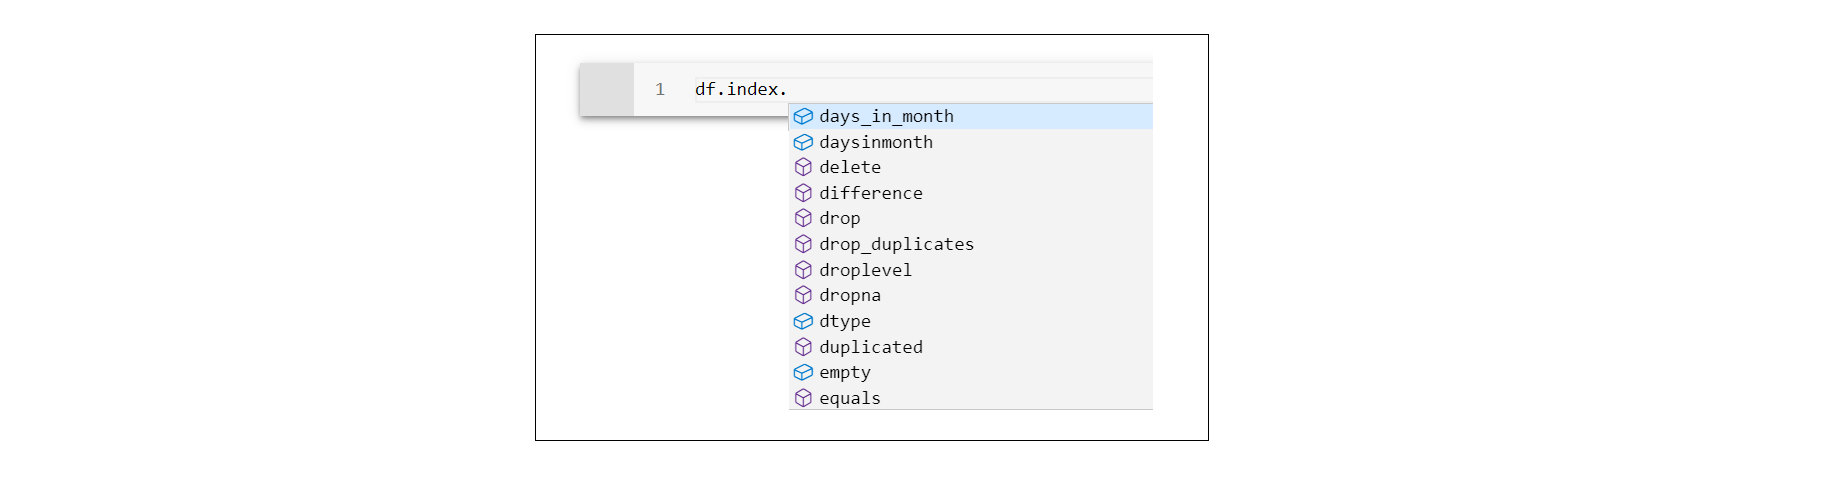

---

If your **date variable is not in the index**, but is a column instead, you should add `.dt` to extract date information
  * Consider the same DataFrame, but instead of having datetime data as index, but as a DataFrame column

df_date = pd.DataFrame(data={'Date':pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'),
                             'Col1':np.random.randint(low=20,high=35,size=24)})

df_date.head()

You should add `.dt` before the date information when indicating the datetime data is a column, not an index.
  * We placed fewer examples here just to demonstrate the use case. You can use all metohds shown in the previous example

df_date['Hour'] = df_date['Date'].dt.hour
df_date['Minute'] = df_date['Date'].dt.minute
df_date['Year'] = df_date['Date'].dt.year
df_date.head()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: The DataFrame below has a datetime index

In the cell indicated below
* add a column to the DataFrame named **Weekday** that shows the name of the day of the week.

np.random.seed(3)
df_index = pd.DataFrame(data={'Revenue':np.random.randint(low=20,high=35,size=28) }, 
                    index=pd.date_range(start='01/05/2021', periods=28,freq='D')
                    )
df_index.head()

# Write your code here
df_index['Weekday'] = df_index.index.day_name()
df_index.head()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: The DataFrame below does not have a datetime index. 

In the cell indicated below, 
* add a column to the DataFrame named **Month** that shows the month name.

np.random.seed(3)
df_column = pd.DataFrame(data={'Date': pd.date_range(start='01/29/2021', periods=28,freq='D'),
                               'Revenue':np.random.randint(low=20,high=35,size=28)})
df_column.head()

# Write your code here
df_column['Month']=df_column['Date'].dt.month
df_column.head()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Resample

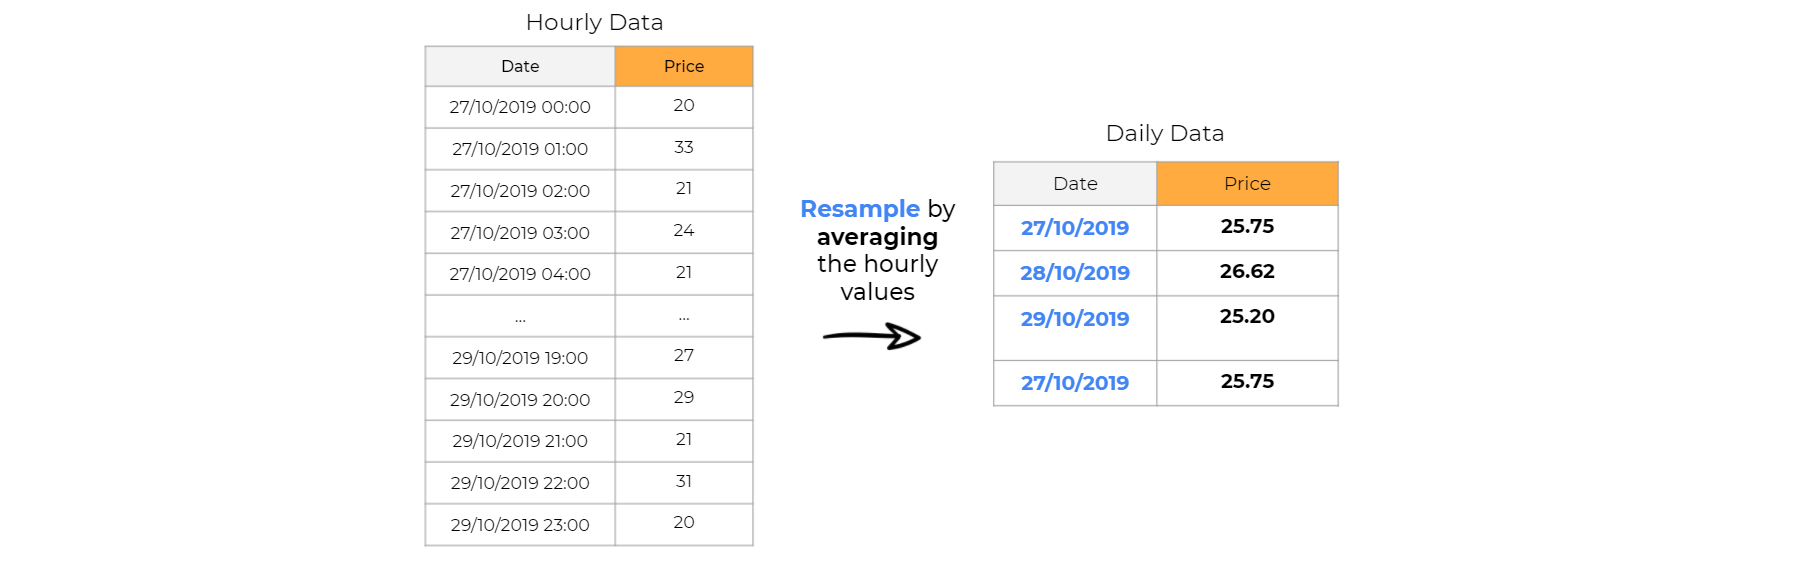

There could be a case where your time series data is in a base time that you are not interested to work with, for example, it is hourly based and you are interested to change for daily based.
  * You can resample your time series, setting this new time base and perform a aggregation for the new time base, using `.resample()`. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).


Consider the following dataset made with NumPy random functions and a index made with `pd.date_range()`

np.random.seed(1)
df = pd.DataFrame(data={'Price':np.random.randint(low=20,high=35,size=72) }, 
                    index=pd.date_range(start='27/10/2019 00:00:00', periods=72,freq='H'))
df

Use `.resample()` to change your time series base time
* The '`rule`' argument is the new frequency you are interested in. It follows the same convention we presented earlier, the documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
* Once you define the rule, you should set the aggreation function you wish to use. We selected `.mean()`. 
* In the end, the code below will get the content of DataFrame df, resample by day and calculate the mean for each day

df_resampled = df.resample(rule='D').mean()
df_resampled

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: The DataFrame below contains sales data for 28 days.

In the cell indicated below
* Use the resample method to display the DataFrame, setting the frequency for weekly and use the aggregation method sum().

np.random.seed(1)
df_sales = pd.DataFrame(data={'Sales':np.random.randint(low=20,high=35,size=28) }, 
                    index=pd.date_range(start='30/08/2021 00:00:00', periods=28,freq='D'))
df_sales.head(10)

# Write your code here
df_sales=df_sales.resample(rule='W').sum()
df_sales.head(10)

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Moving Average

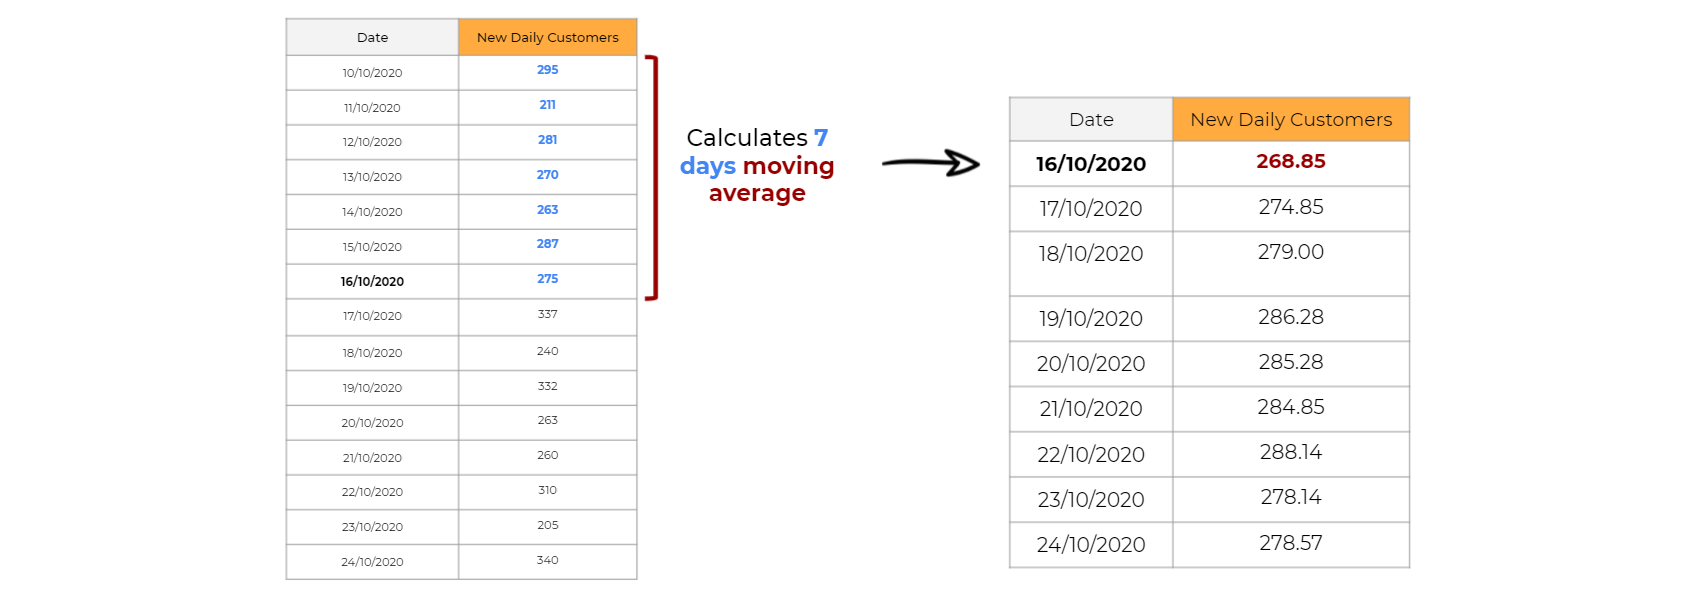

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Pandas can handle moving average also
  * A moving average creates a series of averages of different subsets of the full data. You define a '`window`' that defines the size of these subsets. This is useful to understand time-series trends, and if your data is changing too much too fast, the moving average gives you a better perception of how you data is behaving
* Consider the DataFrame below, daily based with 15 periods, starting on 10 Oct 2020. 


In this example it shows the daily revenue for your fictitious local store

np.random.seed(101)
df = pd.DataFrame(data={'Revenue':np.random.randint(low=200,high=350,size=15) }, 
                    index=pd.date_range(start='10/10/2020', periods=15,freq='D'))
df

You will use `.rolling()`. The function documentation can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)


You want to calculate the moving average for 4 days (`window=4`) and get the mean across the windows. 
  * You will save the result in a variable called '`RevenueMovingAvg`' just to better understand the operation
  * The logic is the following: grab 4 consecutive days and calculate the average. Keep doing that for all days.
    * Look at the index 2020-10-24. The value of `RevenueMovingAvg` is the average of `Revenue` from 2020-10-21 to 2020-10-24.
    * The calculation of mean is "moving" across the chunks of 4 days. That is why it's called moving average.
    * You will notice the first three days don't have a moving average since they don't have enough "predecessor neighbours" to calculate a moving average.

df_example = df.copy()
df_example['RevenueMovingAvg'] = df_example['Revenue'].rolling(window=4).mean()
df_example

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: The DataFrame below is a copy of the df Dataframe.

In the cell indicated below
* Working directly on the Revenue column, use the rolling method to  calculate the sum moving across chunks of 10 days.

df_rolling = df.copy()
df_rolling.head()

# Write your code here
df_rolling['MA_sum']=df_rolling['Revenue'].rolling(window=10).sum()
df_rolling['MA_mean']=df_rolling['Revenue'].rolling(window=10).mean()
df_rolling.head(20)

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Shift

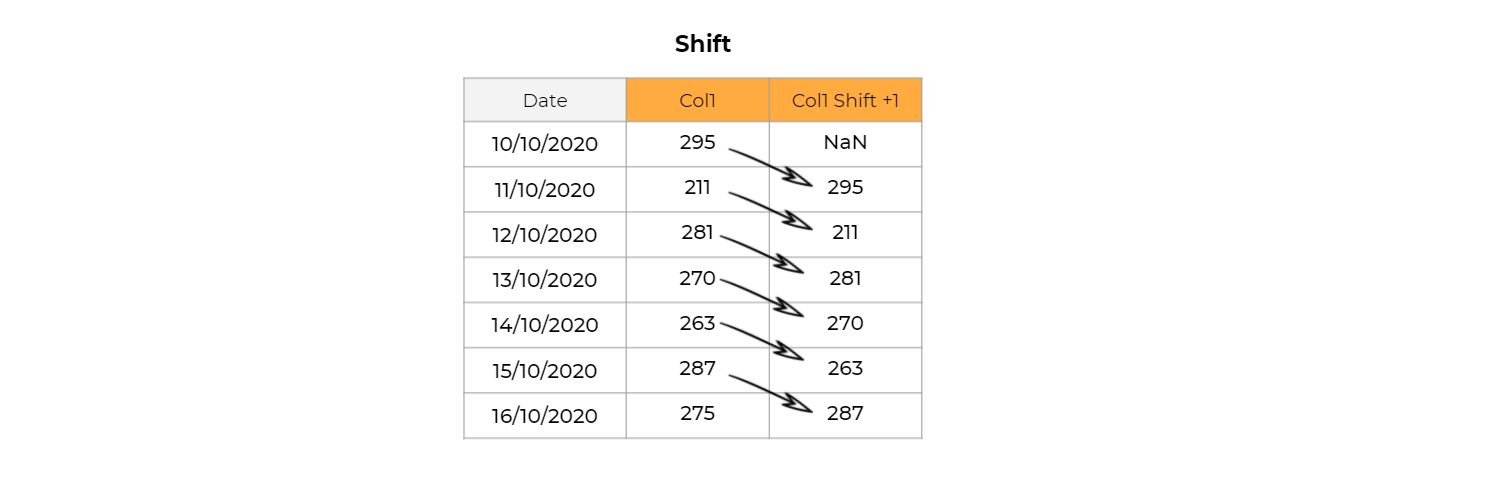

You can shift your data by the desired number of periods.
  * This operation typically make sense in time series data, however it can be applied in other circumstances
* Use the method `.shift()` and define the amount of periods to shift. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)
* In this example we selected the period as 1 and -1. So we are shifting forward one period in one column and shifting backward one period in the other column. This argument is an integer and could be positive or negative

df_example = df.copy()
df_example['RevenueShift+1'] = df_example['Revenue'].shift(periods=1) 
df_example['Revenueshift-1'] = df_example['Revenue'].shift(periods=-1) 
df_example

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Difference

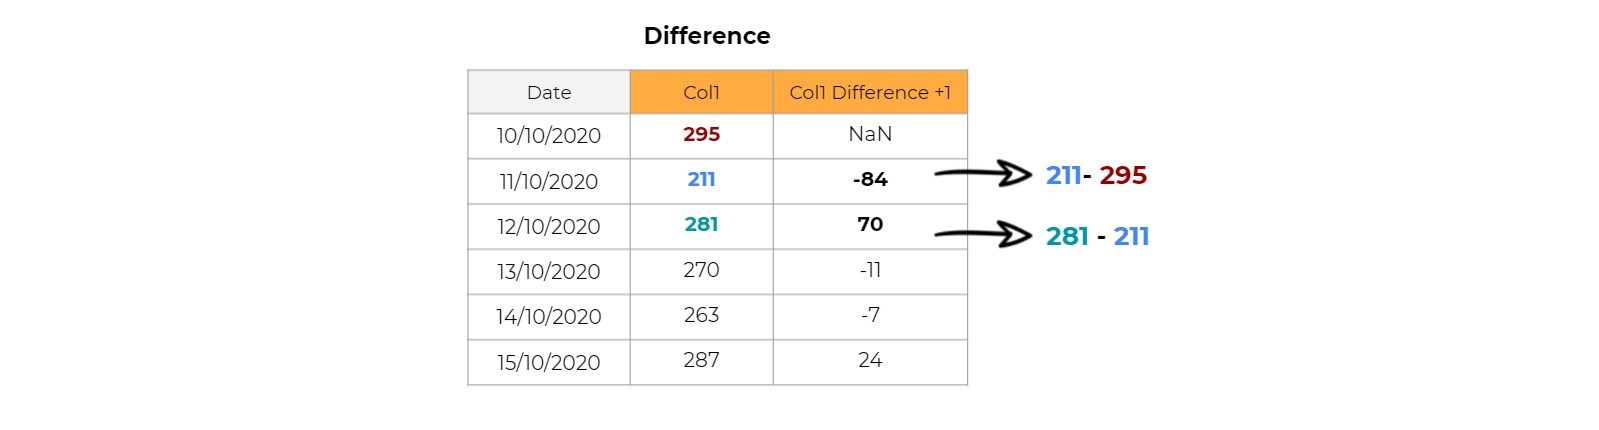

* Still on the "local store revenue" example, you may be interested in calculating the difference between one row element and another. You can do that with `.diff().` The link to the documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)
* This is useful for getting one aspect of how your time series data is changing. In this case, you want to know how much more or less money you are making compared to the previous day
  * '`periods`' argument is an integer and can be positive or negative
* When `period=1`, the first element will be NaN, since there is no previous element to compare with

df_example = df.copy()
df_example['RevenueDiff1'] = df_example['Revenue'].diff(periods=1) 
df_example

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Percentage Change

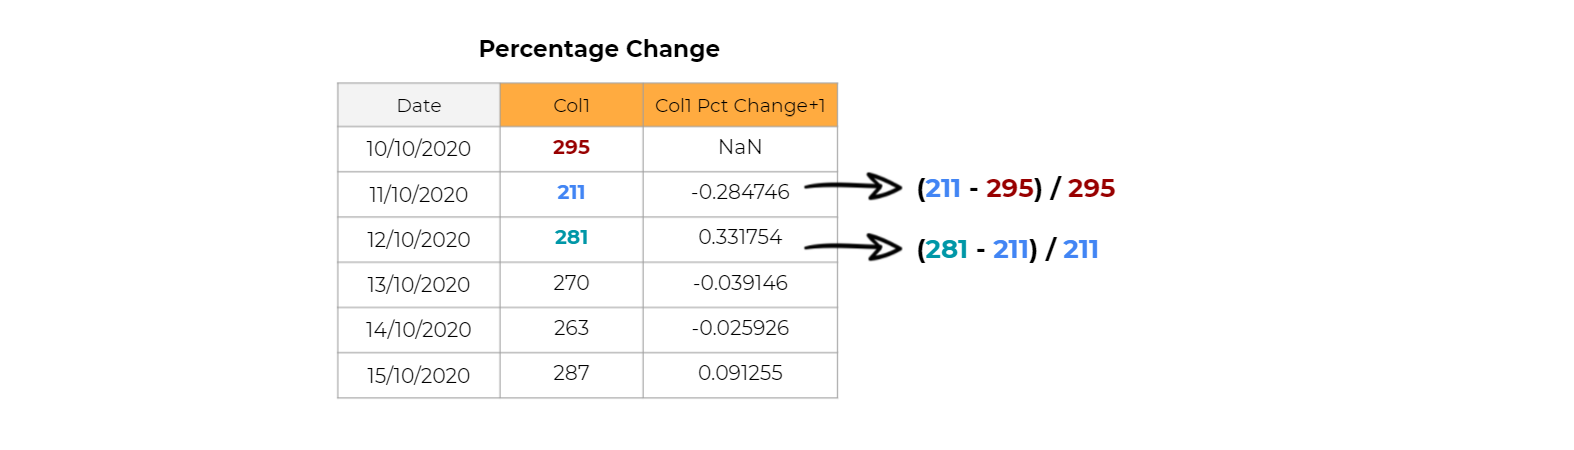

The previous example shows the absolute difference. You can get percentual change with `.pct_change()`. The link for documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)
* The use case here, when the period is 1, is to know the percentage increase/decrease of your Revenue between days
  * When `period=1`, the first element will be NaN, since there is no previous element to compare with

df_example = df.copy()
df_example['PctChange1'] = df_example['Revenue'].pct_change(periods=1) 
df_example

---